# Imports & functions

In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from PIL import Image
from drunet.utils_image import patches_max_entropy_thrs, max_entropy_thrs, max_entropy_init
from skimage.io import imread
from torchaudio import transforms

In [11]:
# List images from folder

folder = "images/capture_Zhu_Robust_Facial_Landmark_Detection_via_Occlusion-Adaptive_Deep_Networks_CVPR_2019_paper"
# folder = "images/capture_Screenshot from 2023-08-29 17-32-08"
# folder = "images/capture_Screenshot from 2023-09-04 10-11-20"
# folder = "images/capture_10484"
file_names = os.listdir(folder)
files = [os.path.join(folder,filename) for filename in file_names]
files

['images/capture_Zhu_Robust_Facial_Landmark_Detection_via_Occlusion-Adaptive_Deep_Networks_CVPR_2019_paper/Zhu_Robust_Facial_Landmark_Detection_via_Occlusion-Adaptive_Deep_Networks_CVPR_2019_paper-gr-tempest_screenshot_12-09-2023_15:16:38.png',
 'images/capture_Zhu_Robust_Facial_Landmark_Detection_via_Occlusion-Adaptive_Deep_Networks_CVPR_2019_paper/Zhu_Robust_Facial_Landmark_Detection_via_Occlusion-Adaptive_Deep_Networks_CVPR_2019_paper-gr-tempest_screenshot_12-09-2023_15:20:20.png',
 'images/capture_Zhu_Robust_Facial_Landmark_Detection_via_Occlusion-Adaptive_Deep_Networks_CVPR_2019_paper/Zhu_Robust_Facial_Landmark_Detection_via_Occlusion-Adaptive_Deep_Networks_CVPR_2019_paper-gr-tempest_screenshot_12-09-2023_15:17:38.png']

# Example with global thresholding ($patch\_size=0$)

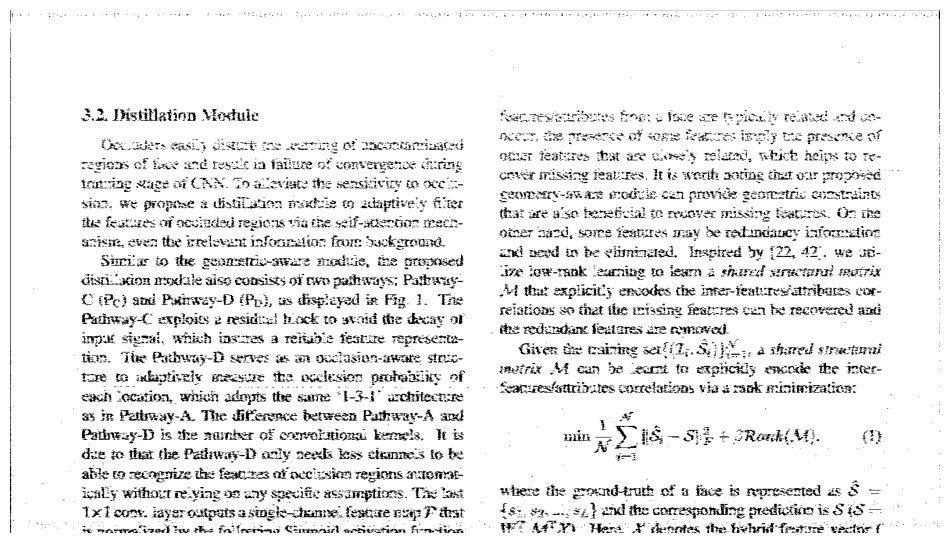

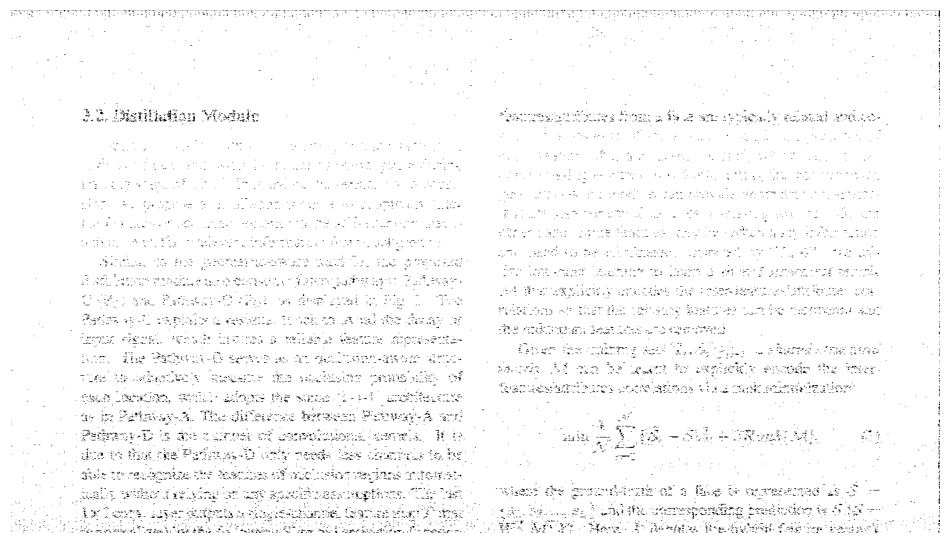

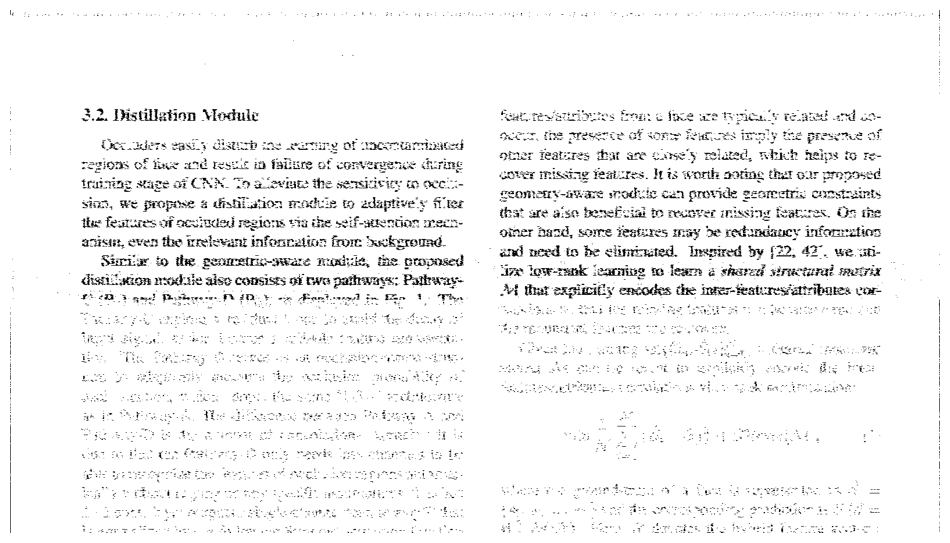

In [14]:
patch_size = 0

for file in files:
    #Load image
    I = imread(file)[:,:,:2]

    I_thrs = max_entropy_init(I,patch_size=patch_size)
    # Show phase and quadrature components
    plt.figure(figsize=(12,8))
    plt.imshow(I_thrs,cmap='gray'), plt.axis('off')
    plt.show()

# Example with global thresholding ($patch\_size~!=0$)

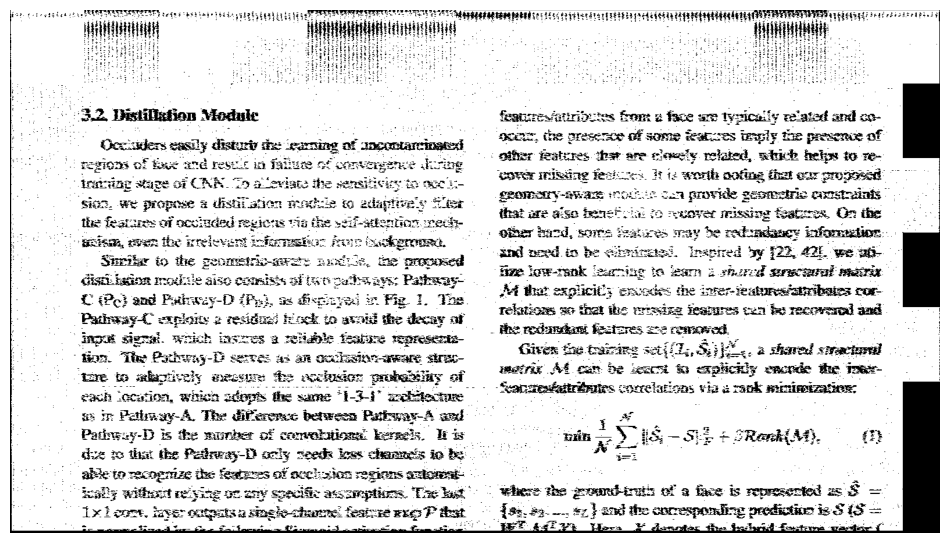

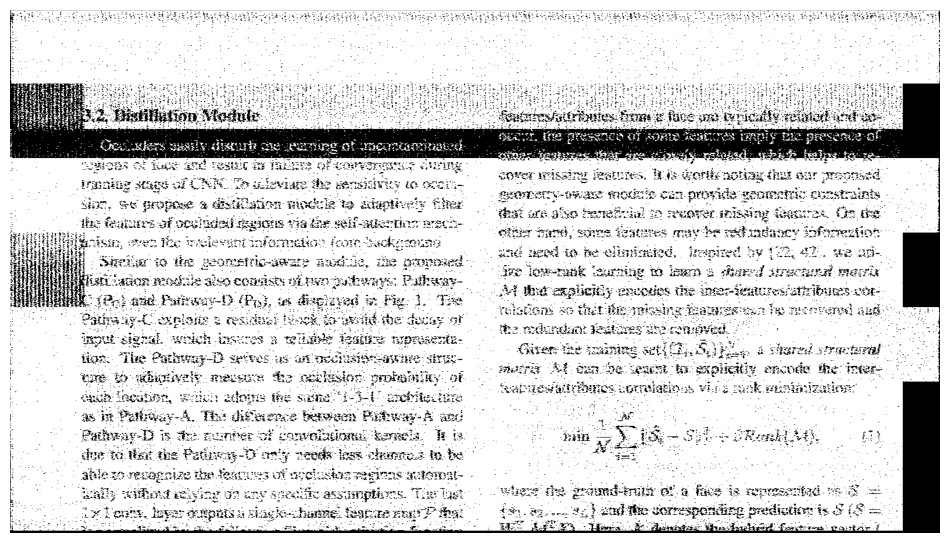

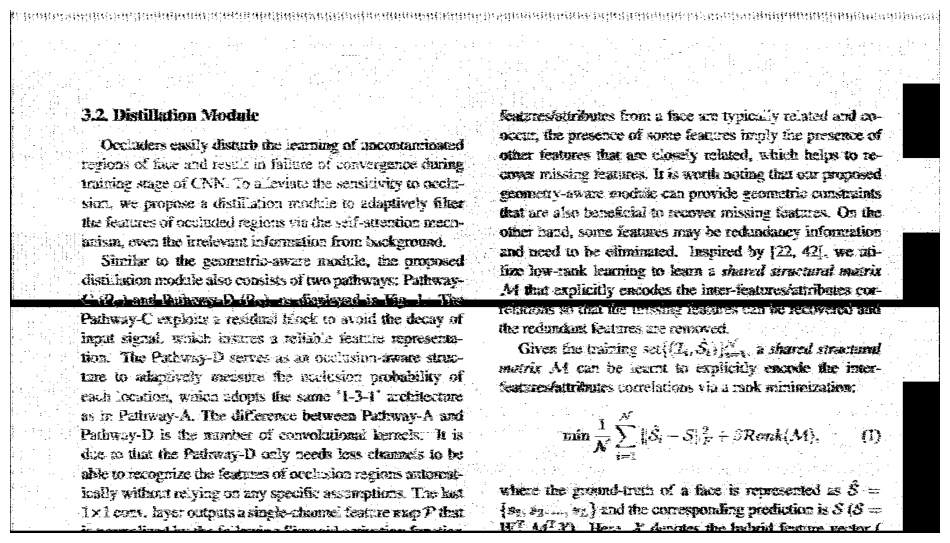

In [15]:
patch_size = 128

for file in files:
    #Load image
    I = imread(file)[:,:,:2]

    I_thrs = max_entropy_init(I,patch_size=patch_size)
    # Show phase and quadrature components
    plt.figure(figsize=(12,8))
    plt.imshow(I_thrs,cmap='gray'), plt.axis('off')
    plt.show()

# Other examples

/home/emidan19/deep-tempest/python_scripts/Plug&Play/drunet/utils_image.py:1032: RuntimeWarning: divide by zero encountered in log
  temp = np.multiply(x, np.log(x))
/home/emidan19/deep-tempest/python_scripts/Plug&Play/drunet/utils_image.py:1032: RuntimeWarning: invalid value encountered in multiply
  temp = np.multiply(x, np.log(x))
/home/emidan19/deep-tempest/python_scripts/Plug&Play/drunet/utils_image.py:1050: RuntimeWarning: invalid value encountered in divide
  Hf[T] = - np.sum( entp(H[:T-1] / np.sum(H[1:T-1])) )
/home/emidan19/deep-tempest/python_scripts/Plug&Play/drunet/utils_image.py:1051: RuntimeWarning: invalid value encountered in divide
  Hb[T] = - np.sum( entp(H[T:] / np.sum(H[T:])) )


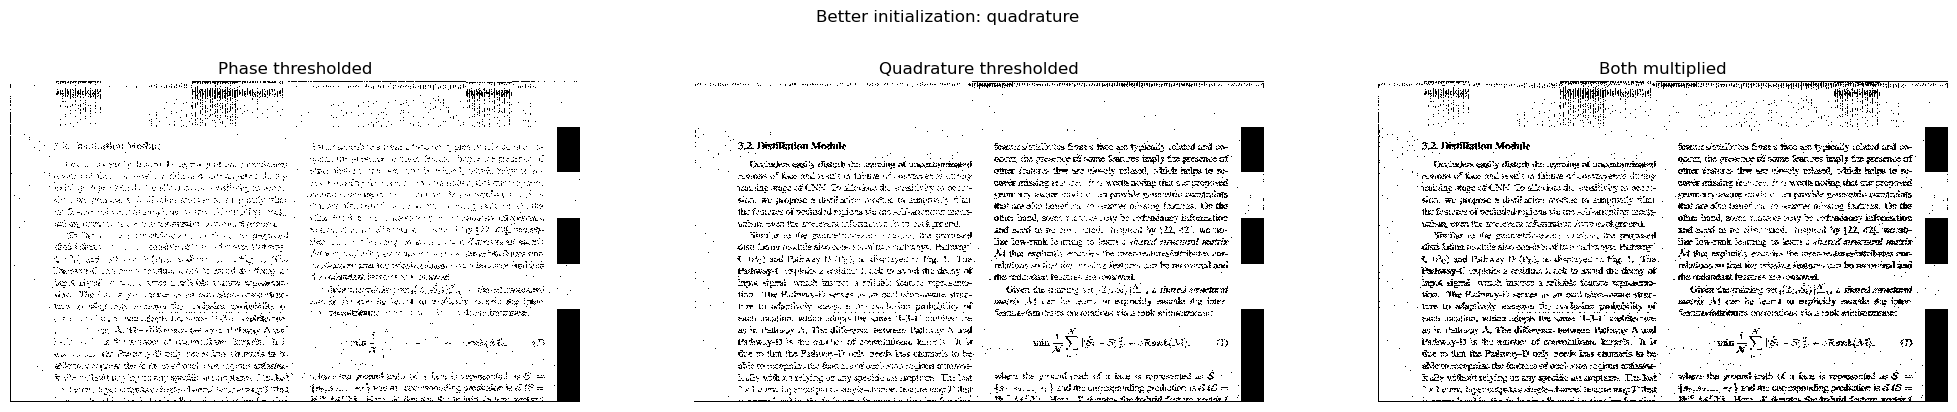

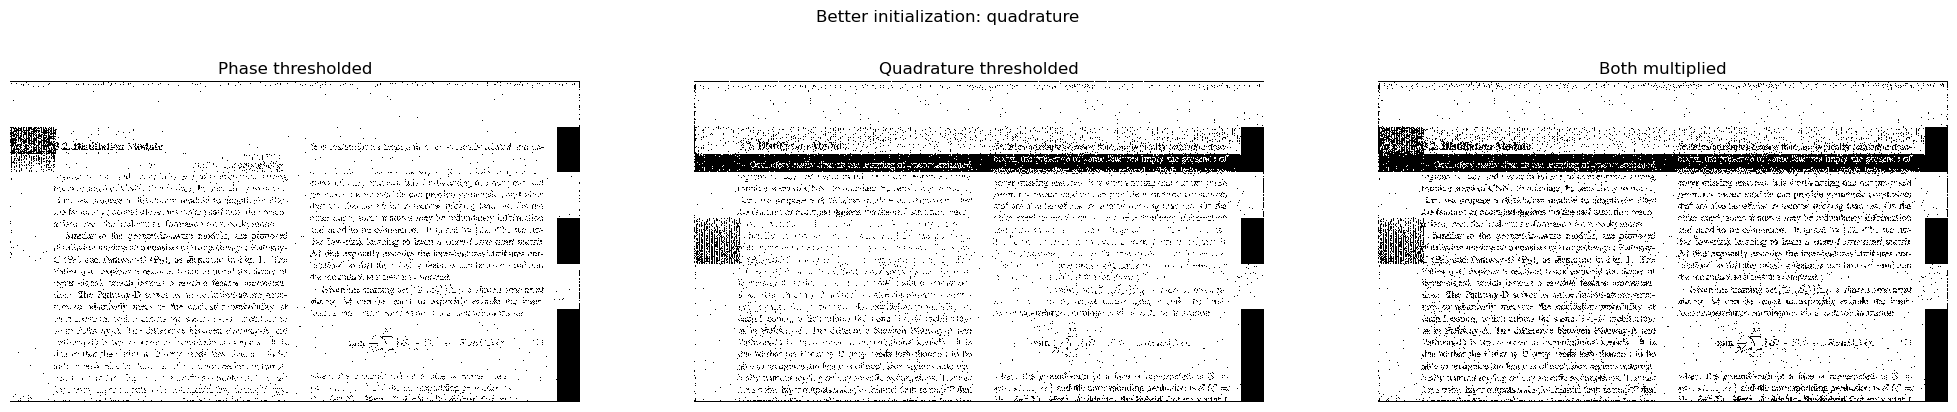

/home/emidan19/deep-tempest/python_scripts/Plug&Play/drunet/utils_image.py:1050: RuntimeWarning: divide by zero encountered in divide
  Hf[T] = - np.sum( entp(H[:T-1] / np.sum(H[1:T-1])) )


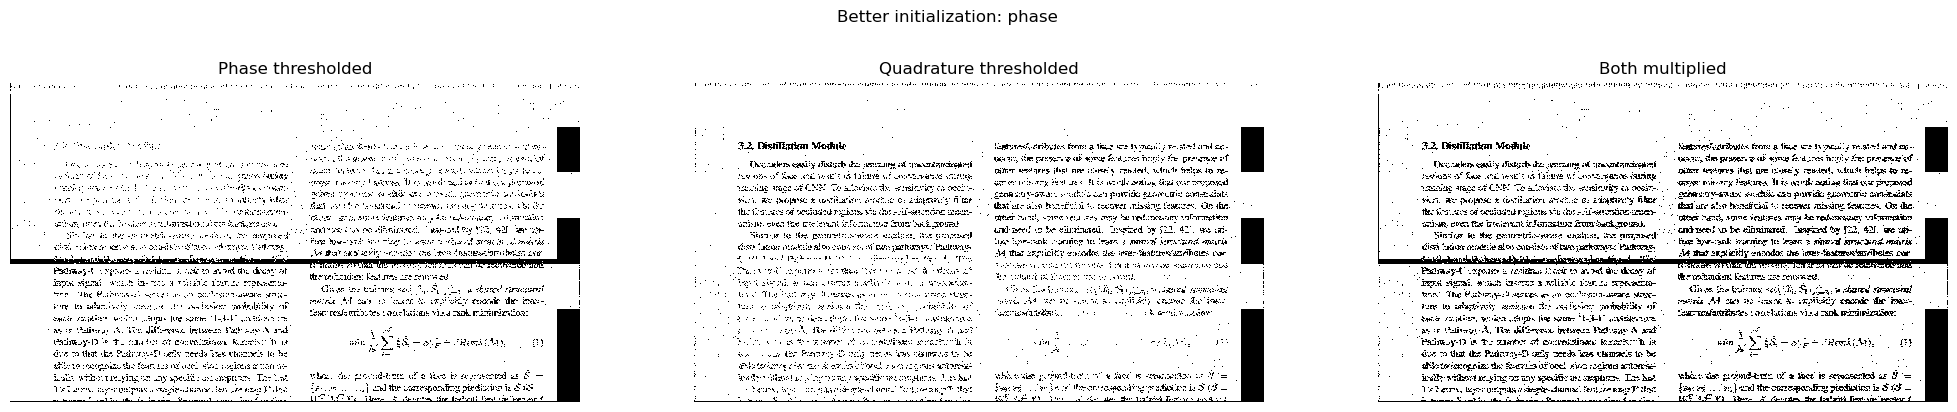

In [16]:
# %matplotlib widget
for file in files:
    #Load image
    I = imread(file)[:,:,:2]

    # Get phase and quadrature components thresholded
    # I_phase_thrs = max_entropy_thrs(I[:,:,0])
    # I_quadr_thrs = max_entropy_thrs(I[:,:,1])

    # Uncomment to threshold by patches
    I_phase_thrs = patches_max_entropy_thrs(I[:,:,0], patch_size = 128)
    I_quadr_thrs = patches_max_entropy_thrs(I[:,:,1], patch_size = 128)

    # Select "best" threshold by counting amount of zeros/black pixels
    better_init = "phase"
    if np.sum(I_phase_thrs) > np.sum(I_quadr_thrs):
        better_init = "quadrature"

    # Show phase and quadrature components
    _, ax = plt.subplots(1,3, figsize=(25,15), sharex=True, sharey=True)
    plt.suptitle(f"Better initialization: {better_init}", y=0.65)
    ax[0].imshow(I_phase_thrs,interpolation='none',cmap='gray'), ax[0].axis('off'), ax[0].set_title('Phase thresholded')
    ax[1].imshow(I_quadr_thrs,interpolation='none',cmap='gray'), ax[1].axis('off'), ax[1].set_title('Quadrature thresholded')
    ax[2].imshow(I_phase_thrs*I_quadr_thrs,interpolation='none',cmap='gray'), ax[2].axis('off'), ax[2].set_title('Both multiplied')
    plt.show()